<a href="https://colab.research.google.com/github/srikanth0904/machine-learning-/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("weight_height_dataset.csv")
df

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal
...,...,...,...
145,181.933161,85.660306,Overweight
146,166.007758,73.997699,Normal
147,158.383396,55.464065,Underweight
148,174.596901,86.130276,Overweight


Class
Normal         50
Underweight    50
Overweight     50
Name: count, dtype: int64


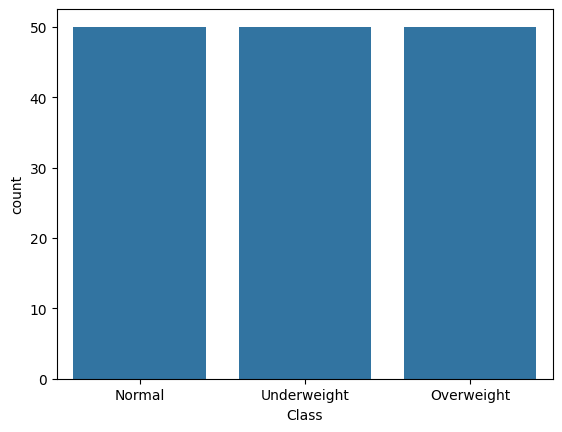

In [6]:
import seaborn as sns

print(df['Class'].value_counts())
sns.countplot(x='Class',data=df)
plt.show()

In [7]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='mimkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred=classifier.predict(X_test)
y_pred

array(['Normal', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Overweight', 'Overweight', 'Underweight',
       'Underweight', 'Normal', 'Overweight', 'Underweight', 'Overweight',
       'Underweight', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Underweight', 'Normal', 'Normal', 'Underweight',
       'Overweight', 'Overweight', 'Overweight', 'Underweight', 'Normal',
       'Normal'], dtype=object)

In [13]:
labels=classifier.classes_
labels

array(['Normal', 'Overweight', 'Underweight'], dtype=object)

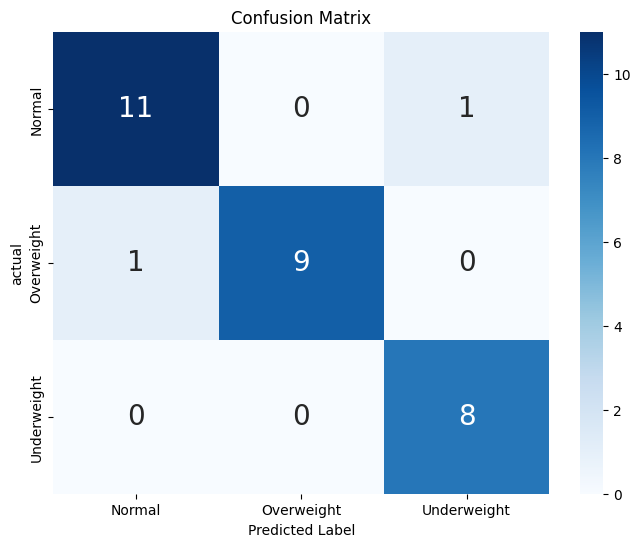

In [17]:
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cf,annot=True,annot_kws={"size":20},fmt='d',cmap='Blue',xticklabels=labels,yticklabels=labels,ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("actual")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92        12
  Overweight       1.00      0.90      0.95        10
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



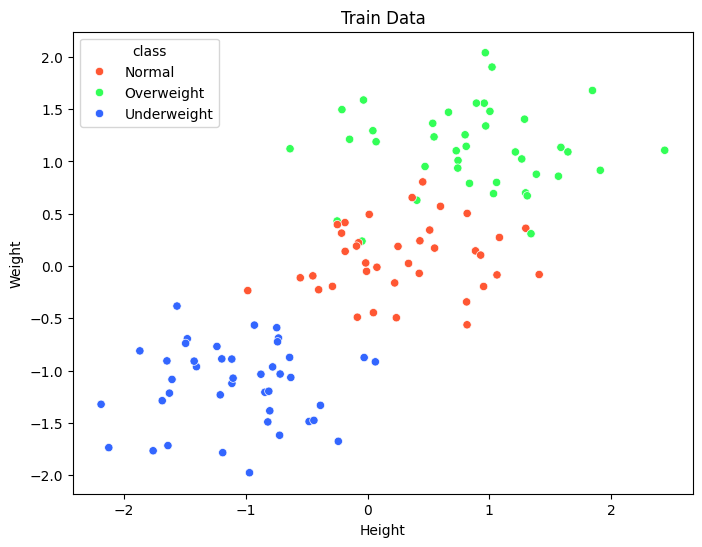

In [18]:
df=pd.DataFrame(X_train,columns=['Height','Weight'])
custom_plalette=['#ff5733','#33ff57','#3366ff']
df['class']=y_train
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Height',y='Weight',hue='class',palette=custom_plalette)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Train Data')
plt.show()

In [20]:
print("training accuracy",accuracy_score(y_true=y_train,y_pred=classifier.predict(X_train)))
print("test data",accuracy_score(y_true=y_test,y_pred=classifier.predict(X_test)))

training accuracy 0.9416666666666667
test data 0.9333333333333333


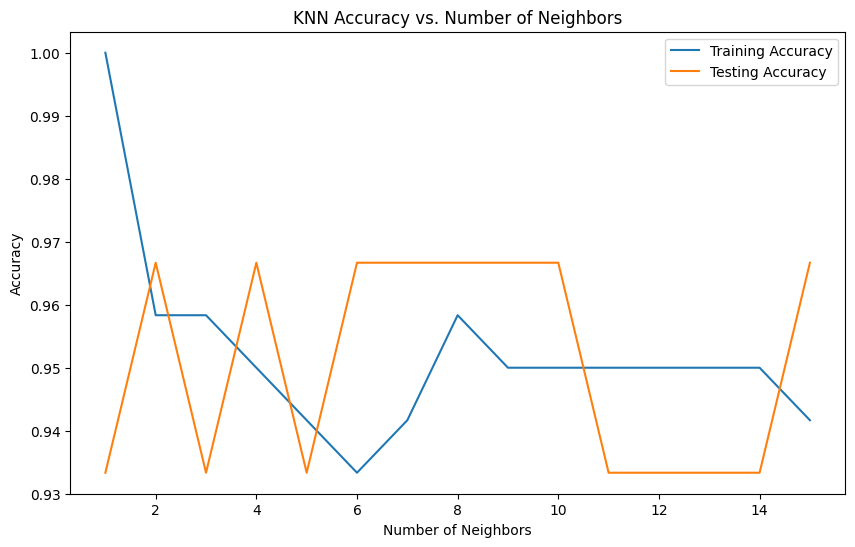

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

neighbors=np.arange(1,16)
train_accuracy=[]
test_accuracy=[]
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    train_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

plt.figure(figsize=(10,6))
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()